In [1]:
import numpy as np
import pandas as pd
from nn_utils import *
from utils import *

## Data Processing

### Applying One-Hot Encoding and Shuffling

In [2]:
col_names = ["Class", "a1", "a2", "a3", "a4", "a5", "a6", "ID"]
tr_data = pd.read_csv("../monk+s+problems/monks-1.train", sep =" ",  names = col_names)
test_data = pd.read_csv("../monk+s+problems/monks-1.test", sep =" ",  names = col_names)

tr_data = process_monk_data(tr_data)
test_data = process_monk_data(test_data)

print(tr_data)

     Class        ID  a1_1  a1_2  a1_3  a2_1  a2_2  a2_3  a3_1  a3_2  a4_1  \
0        1   data_39     1     0     0     1     0     0     0     1     0   
1        1  data_217     0     1     0     0     1     0     0     1     1   
2        0  data_149     0     1     0     1     0     0     1     0     1   
3        1   data_19     1     0     0     1     0     0     1     0     0   
4        0  data_184     0     1     0     1     0     0     0     1     0   
..     ...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
119      0  data_119     1     0     0     0     0     1     1     0     0   
120      0  data_379     0     0     1     0     1     0     0     1     0   
121      0  data_167     0     1     0     1     0     0     1     0     0   
122      1  data_258     0     1     0     0     0     1     1     0     0   
123      0  data_132     1     0     0     0     0     1     0     1     0   

     a4_2  a4_3  a5_1  a5_2  a5_3  a5_4  a6_1  a6_2  
0       1

## Creating the Neural Network

In [3]:
net = NeuralNetwork()

n_inputs = tr_data.shape[1] - 2

net.add_input_layer(n_inputs)

net.add_hidden_layer(n_inputs, 4)

net.add_output_layer(4, 1)

## Training

### Training with Mean Square Error

Epoch = 1, step = 1 total Error post-training = 0.10954654494694052
Epoch = 1, step = 2 total Error post-training = 0.10167231235011019
Epoch = 1, step = 3 total Error post-training = 0.07782084265264885
Epoch = 1, step = 4 total Error post-training = 0.08374554781833282
Epoch = 1, step = 5 total Error post-training = 0.07937873412663499
Epoch = 1, step = 6 total Error post-training = 0.09519291102041665
Epoch = 1, step = 7 total Error post-training = 0.11417470112702047
Epoch = 1, step = 8 total Error post-training = 0.054730643828349024
Epoch = 2, step = 1 total Error post-training = 0.07921362741911506
Epoch = 2, step = 2 total Error post-training = 0.10096030682284005
Epoch = 2, step = 3 total Error post-training = 0.0993170923971222
Epoch = 2, step = 4 total Error post-training = 0.09183340299033774
Epoch = 2, step = 5 total Error post-training = 0.062019703875817164
Epoch = 2, step = 6 total Error post-training = 0.09316793898444399
Epoch = 2, step = 7 total Error post-training =

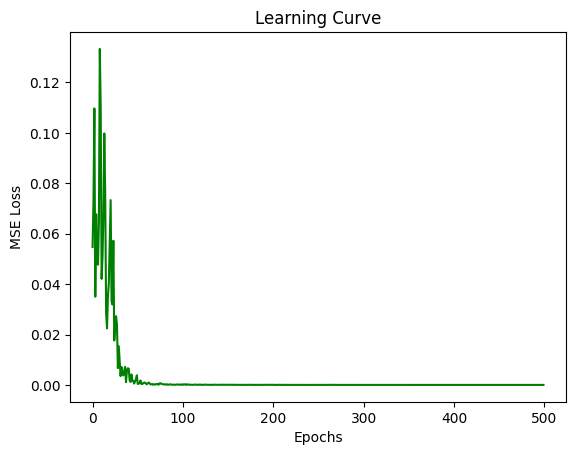

In [4]:

losses = net.train(tr_data, epochs=500,
                   eta=0.5, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="mse")  # TANH IS FASTER?? SCRITTO SULLE SLIDE
# print(net)
# print(net.input_layer.weights)

plot_loss(losses, cost_fun="mse")

### Training with Binary Cross Entropy

In [5]:
'''
#RESET THE NETWORK!!!

losses = net.train(tr_data_X, tr_data_Y, epochs=1000,
                   eta=0.5, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="b_ce")  # TANH IS FASTER?? SCRITTO SULLE SLIDE
# print(net)
# print(net.input_layer.weights)

plot_loss(losses, cost_fun="b_ce")
'''

'\n#RESET THE NETWORK!!!\n\nlosses = net.train(tr_data_X, tr_data_Y, epochs=1000,\n                   eta=0.5, clip_value=None, hid_act_fun="tanh", out_act_fun="sigmoid", cost_fun="b_ce")  # TANH IS FASTER?? SCRITTO SULLE SLIDE\n# print(net)\n# print(net.input_layer.weights)\n\nplot_loss(losses, cost_fun="b_ce")\n'

In [6]:
test_data.drop(["ID"], axis = 1, inplace=True)
test_labels = test_data[["Class"]]
test_data = test_data.drop(["Class"], axis=1)
 
test_err = net.calcError(test_data, test_labels, "tanh", "sigmoid", "mse")
print(test_err)

5.6417207476758125e-06
